In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc

import numpy as np
import urllib
import datetime as dt



In [5]:

def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    



In [15]:
def graph_data(stock):

    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))
    
    # Unfortunately, Yahoo's API is no longer available
    # feel free to adapt the code to another source, or use this drop-in replacement.
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    
    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y-%m-%d')})

    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1


    candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')

    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)

    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.grid(True)
    
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(stock)
    #plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()

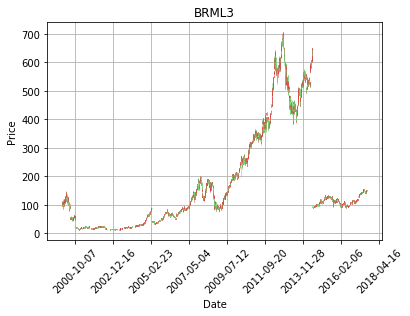

In [16]:
graph_data('BRML3')

In [65]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Set 21 09:11:31 2018

@author:Eduardo S. Sales
Universidade de Brasilia - UnB
"""
%matplotlib notebook 
#import plotly.plotly as py
#import plotly.graph_objs as go
import datetime
from pandas import *
import matplotlib.mlab as mlab
import scipy.signal as signal
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
#import urllib
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import fix_yahoo_finance as yf
import datetime as dt
import seaborn as sns
sns.set()

In [74]:
def yahoo(symbols,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year):
    yf.pdr_override()        
    stocks_yahoo = pdr.get_data_yahoo(symbols, start=datetime(S_Year, S_Month, S_Day), end=datetime(E_Year, E_Month, E_Day),   as_panel = False,)
    return stocks_yahoo

# Índices da Carteira IMOB
Stock=['BRML3','CYRE3']
Stock=[Stock[k]+'.SA' for k in range(len(Stock))]

N_months=24
today = dt.date.today()
E_Day = today.day; E_Month = today.month; E_Year = today.year
day_before=today - dt.timedelta(days=N_months*365/12)
S_Day = day_before.day; S_Month = day_before.month; S_Year = day_before.year

stocks_all=yahoo(Stock,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)
stocks_all.head()

[*********************100%***********************]  2 of 2 downloaded


Open              High               Low             Close  \
           BRML3.SA CYRE3.SA BRML3.SA CYRE3.SA BRML3.SA CYRE3.SA BRML3.SA   
Date                                                                        
2016-09-28  10.8087     9.83  10.9130    10.24  10.6435     9.83  10.7913   
2016-09-29  10.8696    10.09  10.9044    10.34  10.5565    10.03  10.6261   
2016-09-30  10.6783    10.20  10.7913    10.26  10.5217    10.10  10.6957   
2016-10-03  10.6435    10.35  11.1304    10.55  10.6435    10.16  10.9565   
2016-10-04  10.9130    10.55  11.0522    10.56  10.7565    10.30  10.9913   

                     Adj Close             Volume           
           CYRE3.SA   BRML3.SA  CYRE3.SA BRML3.SA CYRE3.SA  
Date                                                        
2016-09-28    10.17  10.732804  9.706149  3364095  3635500  
2016-09-29    10.12  10.568500  9.658429  3741985  1760800  
2016-09-30    10.23  10.637722  9.763412  5047235  1642600  
2016-10-03    10.46  10.897109  9.982923  7689935  2189100  
2016-10-04    10.38  10.931720  9.906571  7061000  1125400

In [75]:
stocks_all.head()
stock=pd.concat([stocks_all.Open[Stock[0]], stocks_all.High[Stock[0]], stocks_all.Low[Stock[0]], stocks_all.Close[Stock[0]],stocks_all.Volume[Stock[0]]], axis=1) 
stock.columns=['Open','High','Low','Close','Volume']
stock.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-09-28,10.8087,10.9130,10.6435,10.7913,3364095
2016-09-29,10.8696,10.9044,10.5565,10.6261,3741985
2016-09-30,10.6783,10.7913,10.5217,10.6957,5047235
2016-10-03,10.6435,11.1304,10.6435,10.9565,7689935
2016-10-04,10.9130,11.0522,10.7565,10.9913,7061000


In [85]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

date = stock.index
openp = stock['Open']
closep = stock['Close']
highp = stock['High']
lowp = stock['Low']
volume = stock['Volume']

x = 0
y = len(date)
ohlc = []

while x < y:
    append_me = date[x], openp[x], highp[x], lowp[x], closep[x]
    ohlc.append(append_me)
    x+=1

candlestick_ohlc(ax1, stock, width=0.4, colorup='#77d879', colordown='#db3f3f')

<IPython.core.display.Javascript object>

ValueError: not enough values to unpack (expected 5, got 4)

<IPython.core.display.Javascript object>


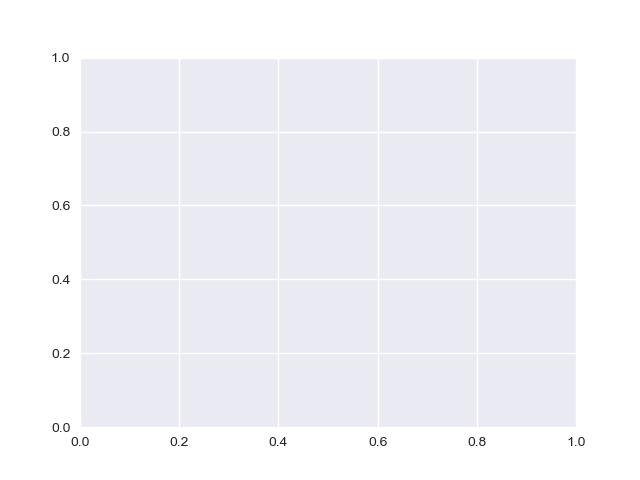

ValueError: not enough values to unpack (expected 5, got 4)

In [77]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))



candlestick_ohlc(ax1, stock, width=0.4, colorup='#77d879', colordown='#db3f3f')

In [26]:
stocks_all['Open']

Date
2016-09-28    10.8087
2016-09-29    10.8696
2016-09-30    10.6783
2016-10-03    10.6435
2016-10-04    10.9130
2016-10-05    11.0435
2016-10-06    11.0435
2016-10-07    11.0783
2016-10-10    11.2696
2016-10-11    11.2609
2016-10-13    11.0522
2016-10-14    11.2435
2016-10-17    11.1478
2016-10-18    11.3913
2016-10-19    11.7391
2016-10-20    11.9478
2016-10-21    11.7826
2016-10-24    11.6696
2016-10-25    11.6783
2016-10-26    11.5565
2016-10-27    11.4870
2016-10-28    11.3043
2016-10-31    11.2783
2016-11-01    11.1565
2016-11-03    10.7304
2016-11-04    10.5913
2016-11-07    10.5304
2016-11-08    10.7739
2016-11-09    10.0956
2016-11-10    10.4348
               ...   
2018-08-16     9.7200
2018-08-17     9.5700
2018-08-20     9.4000
2018-08-21     9.3600
2018-08-22     9.1100
2018-08-23     9.3500
2018-08-24     9.1700
2018-08-27     9.1700
2018-08-28     9.3800
2018-08-29     9.4400
2018-08-30     9.3900
2018-08-31     9.1300
2018-09-03     9.0600
2018-09-04     9.1900
2018-